# FIT5196 Assessment 2
#### Student Name: Reyash Kadyan
#### Student ID: 29895405

Date: 19/5/2019

Version: 1.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:
* pandas 0.22.0 (for data frame, included in Anaconda Python 3.6) 
* numpy 1.14.0 (for data manipulation, included in Anaconda Python 3.6) 
* datetime (for datetime formats , included in Anaconda Python 3.6)
* math (for mathematical functions, like sin, radians, etc., included in Anaconda Python 3.6)
* sklearn.linear_model (for Linear Regression, included in Anaconda Pyhton 3.6)
* sklearn.metrics (for accuracy tests, like r2_score, included in Anaconda Pyhton 3.6)
* networkx has (for creation and manipulation of complex networks, included in Anaconda Pyhton 3.6)
* seaborn (for data visualisation and creating plots, included in Anaconda Pyhton 3.6)
* matplotlib (for data visualisation, included in Anaconda Pyhton 3.6) 

## Introduction

This assignment is about exploring and understanding the data, by performing both graphical and non-graphical EDA methods to first understand the data and then find the data problems. It enables us to practice on the most important process of Data Wrangling. It is devided into three tasks, with three different files, which are:

1. Detecting and fixing errors in 38KB file `29895405_dirty_data.csv`, comprising of 309 rows . 

2. Impute the missing values in 15KB file `29895405_missing_value.csv`, comprising of 120 rows.

3. Detecting and removing outliers in 14KB file `29895405_outliers.csv`, comprising of 100 rows.

The dataset provided is about Uber Ridesharing data in Victoria, Australia. This data set contains the following variables:
* <font color="blue">Id</font>: A unique id for the journey
* <font color="blue">Uber type</font>: A categorical attribute for the type of the journey.
* <font color="blue">Origin region</font>: Region for the origin of the journey
* <font color="blue">Destination region</font>: Region for the destination of the journey
* <font color="blue">Origin latitude</font>: Latitude of the origin
* <font color="blue">Origin longitude</font>: Longitude of the origin
* <font color="blue">Destination latitude</font>: Latitude of the destination
* <font color="blue">Destination longitude</font>: Longitude of the destination
* <font color="blue">Journey Distance</font>: The shortest path, in meters, between the origin and the destination
* <font color="blue">Departure date</font>: Date of the departure
* <font color="blue">Departure time</font>: Time of the departure
* <font color="blue">Travel time</font>: Travel time (i.e., duration) of the journey in seconds
* <font color="blue">Arrival time</font>: The time of the arrival
* <font color="blue">Fare$</font>: The fare of the journey

Two other data files are provided which are `nodes.csv`, which contains data about the latitude and longitude position of any node, and `edges.csv`, which contains information about distance and speed limit between two nodes.

These data set contains the following variables:
`nodes.csv`:
* <font color="blue">id</font>: A node id for the locations
* <font color="blue">lat</font>: Latitude of the node
* <font color="blue">long</font>: Longitude of the node

`edges.csv`:
* <font color="blue">u</font>: Node id for origin location
* <font color="blue">v</font>: Node id for destination location
* <font color="blue">distance(m)</font>: Distance from the origin to the destination node in metres
* <font color="blue">street type</font>: A categorical varibale representing street type between two nodes
* <font color="blue">speed(km/h)</font>: Speed limit from the origin to the destination node in Kilometres per hour

More details for each task will be given in the following sections.

We are assuming all data files are kept in the current working directory. If this is not the case, following code can be used to change the working directory. One can put in the desired path in the given quotes.

In [1]:
# Setting working directory
# import os
# os.chdir('/Users/reyash/Downloads/FIT5196/Assignment-2')

### Importing libraries

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import datetime
from math import radians, atan2, sin, cos,sqrt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1 - Cleaning Dirty Data

This task is to detect and rectify `Semantic` and `Syntactical` anomalies, including formats, integrity constraints, etc. We will begin exploring dirty data now!

### Reading Data

In [3]:
# reading dirty data
data = pd.read_csv('29895405_dirty_data.csv')

# saving column names of dataframes
header = data.columns.to_list()

# reading data about nodes & edges
nodes = pd.read_csv('nodes.csv')
edges = pd.read_csv('edges.csv',index_col = 0)

data = data.rename(columns = {'Unnamed: 0':'Id'})
nodes = nodes.rename(columns = {'Unnamed: 0':'node'})

# renaming columns for easy access while operations
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\(s\)', '').str.replace('\(m\)', '')


In [4]:
data.describe()

uber_type  origin_region  destination_region  origin_latitude  \
count  309.000000     309.000000          309.000000       309.000000   
mean     0.705502       5.058252            5.012945       -36.619492   
std      0.747725       2.459379            2.684702         9.562921   
min      0.000000       1.000000            1.000000       -38.110916   
25%      0.000000       3.000000            3.000000       -37.823450   
50%      1.000000       5.000000            5.000000       -37.814464   
75%      1.000000       7.000000            7.000000       -37.804417   
max      3.000000       9.000000            9.000000        37.861835   

       origin_longitude  destination_latitude  destination_longitude  \
count        309.000000            309.000000             309.000000   
mean         144.937018            -36.637928             144.917716   
std            0.100922              9.566080               0.121151   
min          144.654173            -38.110916             144.654173   
25%          144.927414            -37.861835             144.905716   
50%          144.960728            -37.814796             144.955328   
75%          144.990059            -37.805850             144.985865   
max          145.046450             37.861835             145.046450   

       journey_distance   travel_time        fare$  
count        309.000000    309.000000   309.000000  
mean       17159.584142   4429.433722    94.252589  
std        17587.588475   4240.886697   253.780360  
min          537.000000    153.540000     2.710000  
25%         4534.000000   1210.180000    11.650000  
50%         8722.000000   2530.320000    17.400000  
75%        41560.000000   9972.900000    29.330000  
max        51061.000000  13204.980000  1315.170000

Some anomalies found upon inspection are,

* **Syntactic Anomalies**
    - `uber_type` has minimum value of 0 and maximum of 3, which contradicts its description of having three type values.
   
    - `origin_latitude` and `destination_latitude` has maximum value of 37.861835, which contradicts the fact of data being about uber rides in Victoria, since Victoria is in southern hemishpere, which corresponds to negative latitude values.

In [5]:
# Looking at the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
id                       309 non-null object
uber_type                309 non-null int64
origin_region            309 non-null int64
destination_region       309 non-null int64
origin_latitude          309 non-null float64
origin_longitude         309 non-null float64
destination_latitude     309 non-null float64
destination_longitude    309 non-null float64
journey_distance         309 non-null float64
departure_date           309 non-null object
departure_time           309 non-null object
travel_time              309 non-null float64
arrival_time             309 non-null object
fare$                    309 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 33.9+ KB


Let's have a look at few values of the dataset.

In [6]:
# Priting first 5 elements in the dataset
data.head()

id  uber_type  origin_region  destination_region  \
0  ID3487635877          1              8                   4   
1  ID1553159484          0              3                   4   
2  ID3397114293          1              8                   6   
3  ID3646335243          1              5                   6   
4  ID3427629663          1              7                   4   

   origin_latitude  origin_longitude  destination_latitude  \
0       -37.815834        145.046450            -37.810009   
1       -37.810907        144.988892            -37.808068   
2       -37.815834        145.046450            -37.790797   
3       -37.799047        144.935588            -37.790797   
4       -37.861835        144.905716            -37.814118   

   destination_longitude  journey_distance departure_date departure_time  \
0             144.995790            4510.0     2018-03-09       07:24:43   
1             144.991715             537.0     2018-05-08       08:22:56   
2             144.985865            7470.0     2018-04-20       21:25:59   
3             144.985865            7771.0     2018-07-14       10:44:36   
4             145.009281           11869.0     2018-07-26       11:59:45   

   travel_time arrival_time  fare$  
0      1411.44      7:48:14   9.04  
1       153.54      8:25:29   3.91  
2      2302.38     22:04:21  25.32  
3      2060.88     11:18:56  16.15  
4      3714.66     13:01:39  17.24

### Uber Type

Upon inspecting the data more carefully, it is apparent that there is a pattern between `id` and `uber_type`, which is, ID's strating with 'ID1' corresponds to uber type '0', ID's strating with 'ID3' corresponds to uber type '1', and ID's strating with 'ID5' corresponds to uber type '2'.

Using the information about the presence of three uber types and aforementioned pattern we can correct the rows with uber type as 3! 

In [7]:
uber_types = {0,1,2} # Acceptable uber types

print('Number of rows with unacceptable uber types are',data[~data.uber_type.isin(uber_types)].shape[0],'.')

Number of rows with unacceptable uber types are 6 .


In [8]:
# Fetching indexes of rows with unacceptable uber types
uber_indexes = data[~data.uber_type.isin(uber_types)].index.to_list()

# Following loop compares the ID string with the patterns passed and updates the uber type accordingly
for index in uber_indexes:
    if data.loc[index,'id'].startswith('ID1'):
        data.loc[index,'uber_type'] = 0
    elif data.loc[index,'id'].startswith('ID3'):
        data.loc[index,'uber_type'] = 1
    else:
        data.loc[index,'uber_type'] = 2

In [9]:
print('Number of rows with unacceptable uber types after correction are',data[~data.uber_type.isin(uber_types)].shape[0],'.')

Number of rows with unacceptable uber types after correction are 0 .


### Latitude values

Since the data is about uber rides in victoria, where latitude values are negative and longitude are postive. Therefore, positive latitude and negative longitudes are unacceptable. We will correct it by simply negating wrong latitude and longitude values.

In [10]:
print('Number of rows with postive latitudes are', data[(data.origin_latitude > 0) | (data.destination_latitude > 0)].shape[0],'.')
print('Number of rows with negative longitudes are', data[(data.origin_longitude < 0) | (data.destination_longitude < 0)].shape[0],'.')

Number of rows with postive latitudes are 10 .
Number of rows with negative longitudes are 0 .


In [11]:
# Fixing latitudes 
    
# Fetching indexes of positive latitudes
origin_indexes = data[(data.origin_latitude > 0)].index
dest_indexes = data[(data.destination_latitude > 0)].index

# Storing indexes of rows with wrong latitude values
lat_indexes = data[(data.origin_latitude > 0) | (data.destination_latitude > 0)].index.to_list()

# Negating wrong latitude values in 'origin_latitude' and 'destination_latitude'
data.loc[(data.origin_latitude > 0), 'origin_latitude'] = data[(data.origin_latitude > 0)].origin_latitude.apply(lambda x: -x)
data.loc[(data.destination_latitude > 0), 'destination_latitude'] = data[(data.destination_latitude > 0)].destination_latitude.apply(lambda x: -x)


In [12]:
print('Number of rows with postive latitudes after correction are', data[(data.origin_latitude > 0) | (data.destination_latitude > 0)].shape[0],'.')

Number of rows with postive latitudes after correction are 0 .


### Regions

Now we will explore the region of origin and destination nodes.

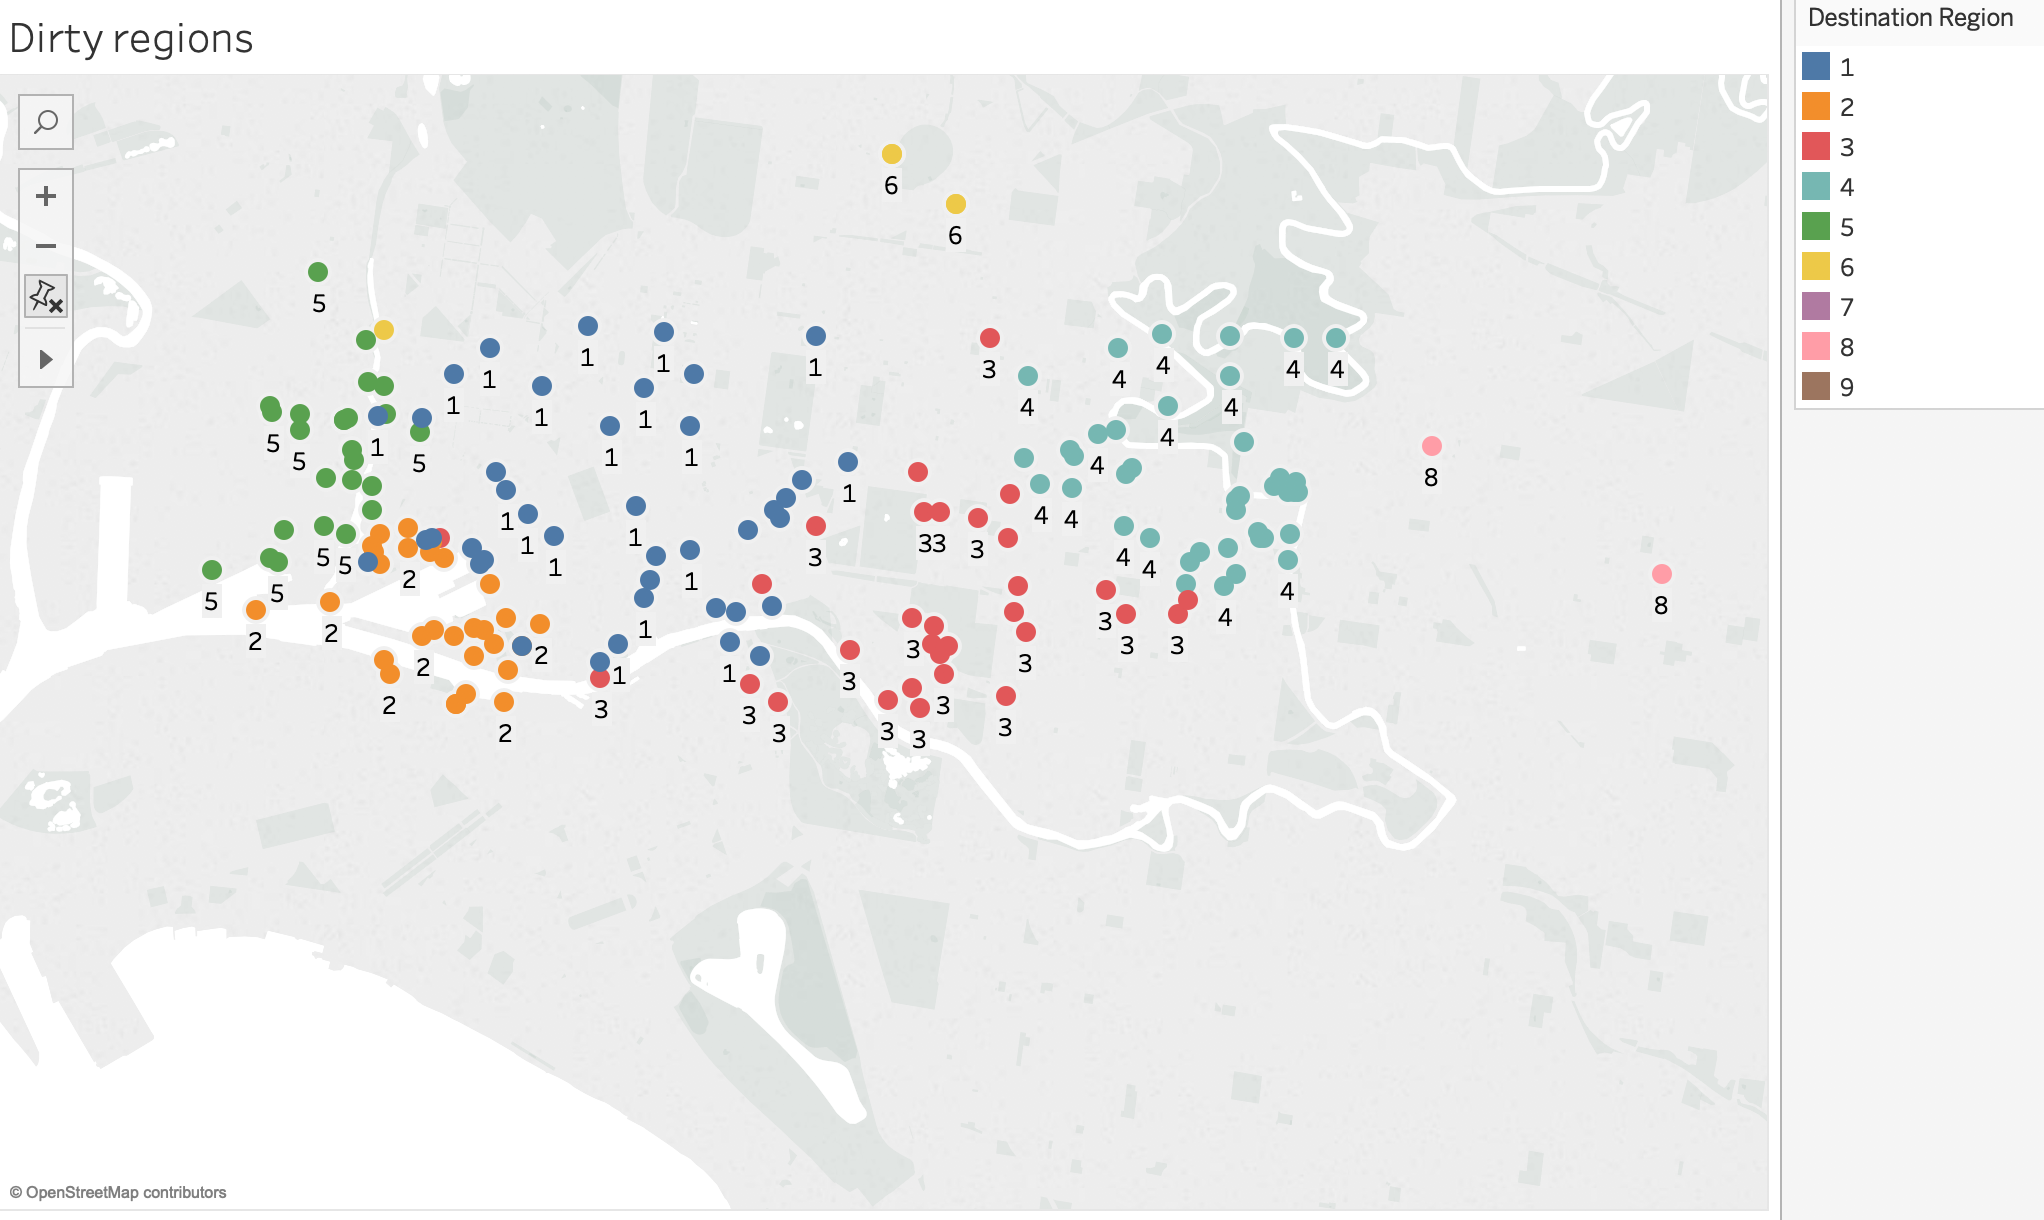

We can see from the figure above that regions are overlapping, which is wrong.

We will be using haversine distance to compute distance between two locations of earth, which is explained as follows.

#### Haversine formula

The distance between any two points on the earth, can be calculated through haversine formula, given their logitude and latitude details, which is,

$d=2R .atan2(\sqrt{h},\sqrt{1-h})$, where, 

h is the haversine formula given by, 

$h = sin^{2}\left ( \frac{\phi_{2}-\phi_{1}}{2} \right ) + cos(\phi_{1}).cos(\phi_{2}).sin^{2}\left ( \frac{\lambda_{2}-\lambda_{1}}{2} \right ),$

$R = \text{Radius of Earth},\\
\phi_{1} = \text{Latitude of point 1},\\
\phi_{2} = \text{Latitude of point 2},\\
\lambda_{1} = \text{Longitude of point 1},\\
\lambda_{2} = \text{Longitude of point 2}$



In [13]:
print(data.groupby(['origin_latitude','origin_longitude']).origin_region.unique().head())
print(data.groupby(['destination_latitude','destination_longitude']).destination_region.unique().head())

origin_latitude  origin_longitude
-38.110916       144.654173          [9, 6]
-37.861835       144.905716          [7, 1]
-37.826364       144.951835             [2]
-37.826175       145.008375             [3]
-37.825421       144.980994             [3]
Name: origin_region, dtype: object
destination_latitude  destination_longitude
-38.110916            144.654173               [9, 3]
-37.861835            144.905716                  [7]
-37.825002            144.982767                  [3]
-37.824725            144.943005                  [2]
-37.824703            144.942872                  [2]
Name: destination_region, dtype: object


Apparently, some nodes corresponds to two regions, which violates integrity constraint. This is a '**Semantic Anomaly**'.

We can correct this by exploring all the occurances of nodes in origin and destination region, and selecting the common/frequent value of region . If no value is common, we can select any for now.

In [14]:
# Checking integrity constraints

# Fetching origin and destination nodes
origin_regions = dict(data.groupby(['origin_latitude','origin_longitude']).origin_region.unique())
destination_regions = dict(data.groupby(['destination_latitude','destination_longitude']).destination_region.unique())

# Filtering common occurances of nodes in origin and destination regions
common_nodes = list(set(origin_regions.keys()).intersection(set(destination_regions.keys())))

# Following loop interates over all the common nodes and find the common value for region, if any.
# If it finds any common value of region, it assigns common value of the region to both origin region and destination region.
# If no common value is found, it assigns the first occurance values in origin to all.

for node in common_nodes:
    common_region = list(set(origin_regions[node]).intersection(set(destination_regions[node])))
    if common_region:
        origin_regions[node] = common_region
        destination_regions[node] = common_region
    else:
        destination_regions[node] = origin_regions[node]

# Assigning region values to origin region and destination region.
for key,value in origin_regions.items():
    data.loc[((data.origin_latitude == key[0]) & (data.origin_longitude == key[1])),'origin_region'] = value[0]
    
for key,value in destination_regions.items():
    data.loc[((data.destination_latitude == key[0]) & (data.destination_longitude == key[1])),'destination_region'] = value[0]
    

Now we will compute centres of regions using both origin regions and destination regions. We will combine information about all nodes and compute median values of latitude and longitude for each region, which will correspond to centre of regions.

In [15]:
# Fetching relevant columns
origin_data = data[['origin_region','origin_latitude','origin_longitude']]
destination_data = data[['destination_region','destination_latitude','destination_longitude']]
regions_cols = ['region','latitude','longitude']

# Renaming columns uniformly, for concatenation
origin_data.columns = regions_cols
destination_data.columns = regions_cols

# Computing medians on concatenated dataframe of both, origin and destination region, for each region
# Concatenated data is grouped by region values. Median is computed on the grouped data
region_centre = (pd.concat([origin_data,destination_data]).groupby(['region']).median()).T.to_dict('list')  # storing as a dictionary
region_centre

{1: [-37.81182145, 144.9566952],
 2: [-37.819409949999994, 144.94080205],
 3: [-37.818959400000004, 144.98421405],
 4: [-37.8099899, 145.00706280000003],
 5: [-37.8054636, 144.9322708],
 6: [-37.7874325, 144.98364660000001],
 7: [-37.8618349, 144.90571599999998],
 8: [-37.8158343, 145.04645],
 9: [-38.1109156, 144.65417250000002]}

Now we will define, functions to compute haversine distance, calculate closest region centre and clusters of all nodes.

In [16]:
# Following function accepts latitude and longitudes of two locations and returns haversine distance between them
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6378 # radius of the earth in KMs
    
    lat_diff = radians(lat2 - lat1)
    long_diff = radians(lon2 - lon1)
    
    rad_lat1 = radians(lat1)
    rad_lat2 = radians(lat2)
    
    h = (sin(lat_diff/2) ** 2)+(cos(rad_lat1) * cos(rad_lat2) * (sin(long_diff/2) ** 2))
    
    polar = atan2(sqrt(h), sqrt(1-h))

    distance = (2*R*polar)*1000 # Distance is in KMs, multiply by 1000 to get meters
    
    return round(distance, 3)


In [17]:
# Following function accepts latitude and longitude of a position, alongwith details of region centres, and returns the closest region corresponding to that node.
def closest_region(lat, long, centre):
    '''
    This function accepts latitude and longitude of a node, compute its distance from all the centres of the region.
    It returns the value of closest region
    '''
    distance_from_regions = {}
    # Calculating distances from all centres
    for region, coordinates in centre.items():
        distance_from_regions[region] = haversine_distance(lat, long,coordinates[0], coordinates[1] )
    shortest = min(distance_from_regions, key = distance_from_regions.get) # returing the region index, based on the distances computed above
    return shortest

In [18]:
# Following function is basic K-Means implementation for computing optimal clusters of region
# It returns optimal region values for each node

def Kmeans_region(centre, region_type):
    
    '''
    This function accepts region centres and the type of region (destination/origin).
    It assigns new region values to nodes, according to shortest distance from centres, and compute new centres iteratively.
    It repeats aforementioned process until the centres stop moving, and have achieved an optimal state
    '''
    
    new_centres = centre 
    old_centres = {} # for storing current centres for next iteration
    counter = 0
    while (new_centres != old_centres): # runs until centres stop changing
#         print(counter)
        old_centres = new_centres.copy()
        
        # Calculating new centres
        centre_lat = dict(data.groupby('calc_{}_region'.format(region_type))['{}_latitude'.format(region_type)].median())
        centre_long= dict(data.groupby('calc_{}_region'.format(region_type))['{}_longitude'.format(region_type)].median())
        regions = sorted(data['{}_region'.format(region_type)].unique().tolist())
        new_centres = {}
        for region in regions:
            new_centres[region] = [centre_lat[region], centre_long[region]]
        
        # Assigning region according to new centres generated
        data['calc_{}_region'.format(region_type)] = data[['{}_latitude'.format(region_type),'{}_longitude'.format(region_type)]].apply(lambda t: closest_region(t['{}_latitude'.format(region_type)],t['{}_longitude'.format(region_type)],new_centres), axis=1)

        counter += 1

In [19]:
# Computing Optimal region values for each node

# Assigning nodes to nearest region centers initially
data['calc_origin_region'] = data[['origin_latitude','origin_longitude']].apply(lambda t: closest_region(t.origin_latitude,t.origin_longitude,region_centre), axis=1)
data['calc_destination_region'] = data[['destination_latitude','destination_longitude']].apply(lambda t: closest_region(t.destination_latitude,t.destination_longitude,region_centre), axis=1)

# Iteratively computing for optimal region
Kmeans_region(region_centre,'origin')
Kmeans_region(region_centre,'destination')


In [20]:
print('Number of origin region values changed are',data[data.origin_region != data.calc_origin_region].shape[0],'.')
print('Number of destination region values changed are',data[data.destination_region != data.calc_destination_region].shape[0],'.')

Number of origin region values changed are 46 .
Number of destination region values changed are 37 .


In [21]:
# Updating final optimal values
data.loc[data.origin_region != data.calc_origin_region,'origin_region'] = data[data.origin_region != data.calc_origin_region].calc_origin_region
data.loc[data.destination_region != data.calc_destination_region,'destination_region'] = data[data.destination_region != data.calc_destination_region].calc_destination_region


In [22]:
data.to_csv('region.csv', index = False)

#### Regions after correction

We can see that regions are properly segregated after K-means!

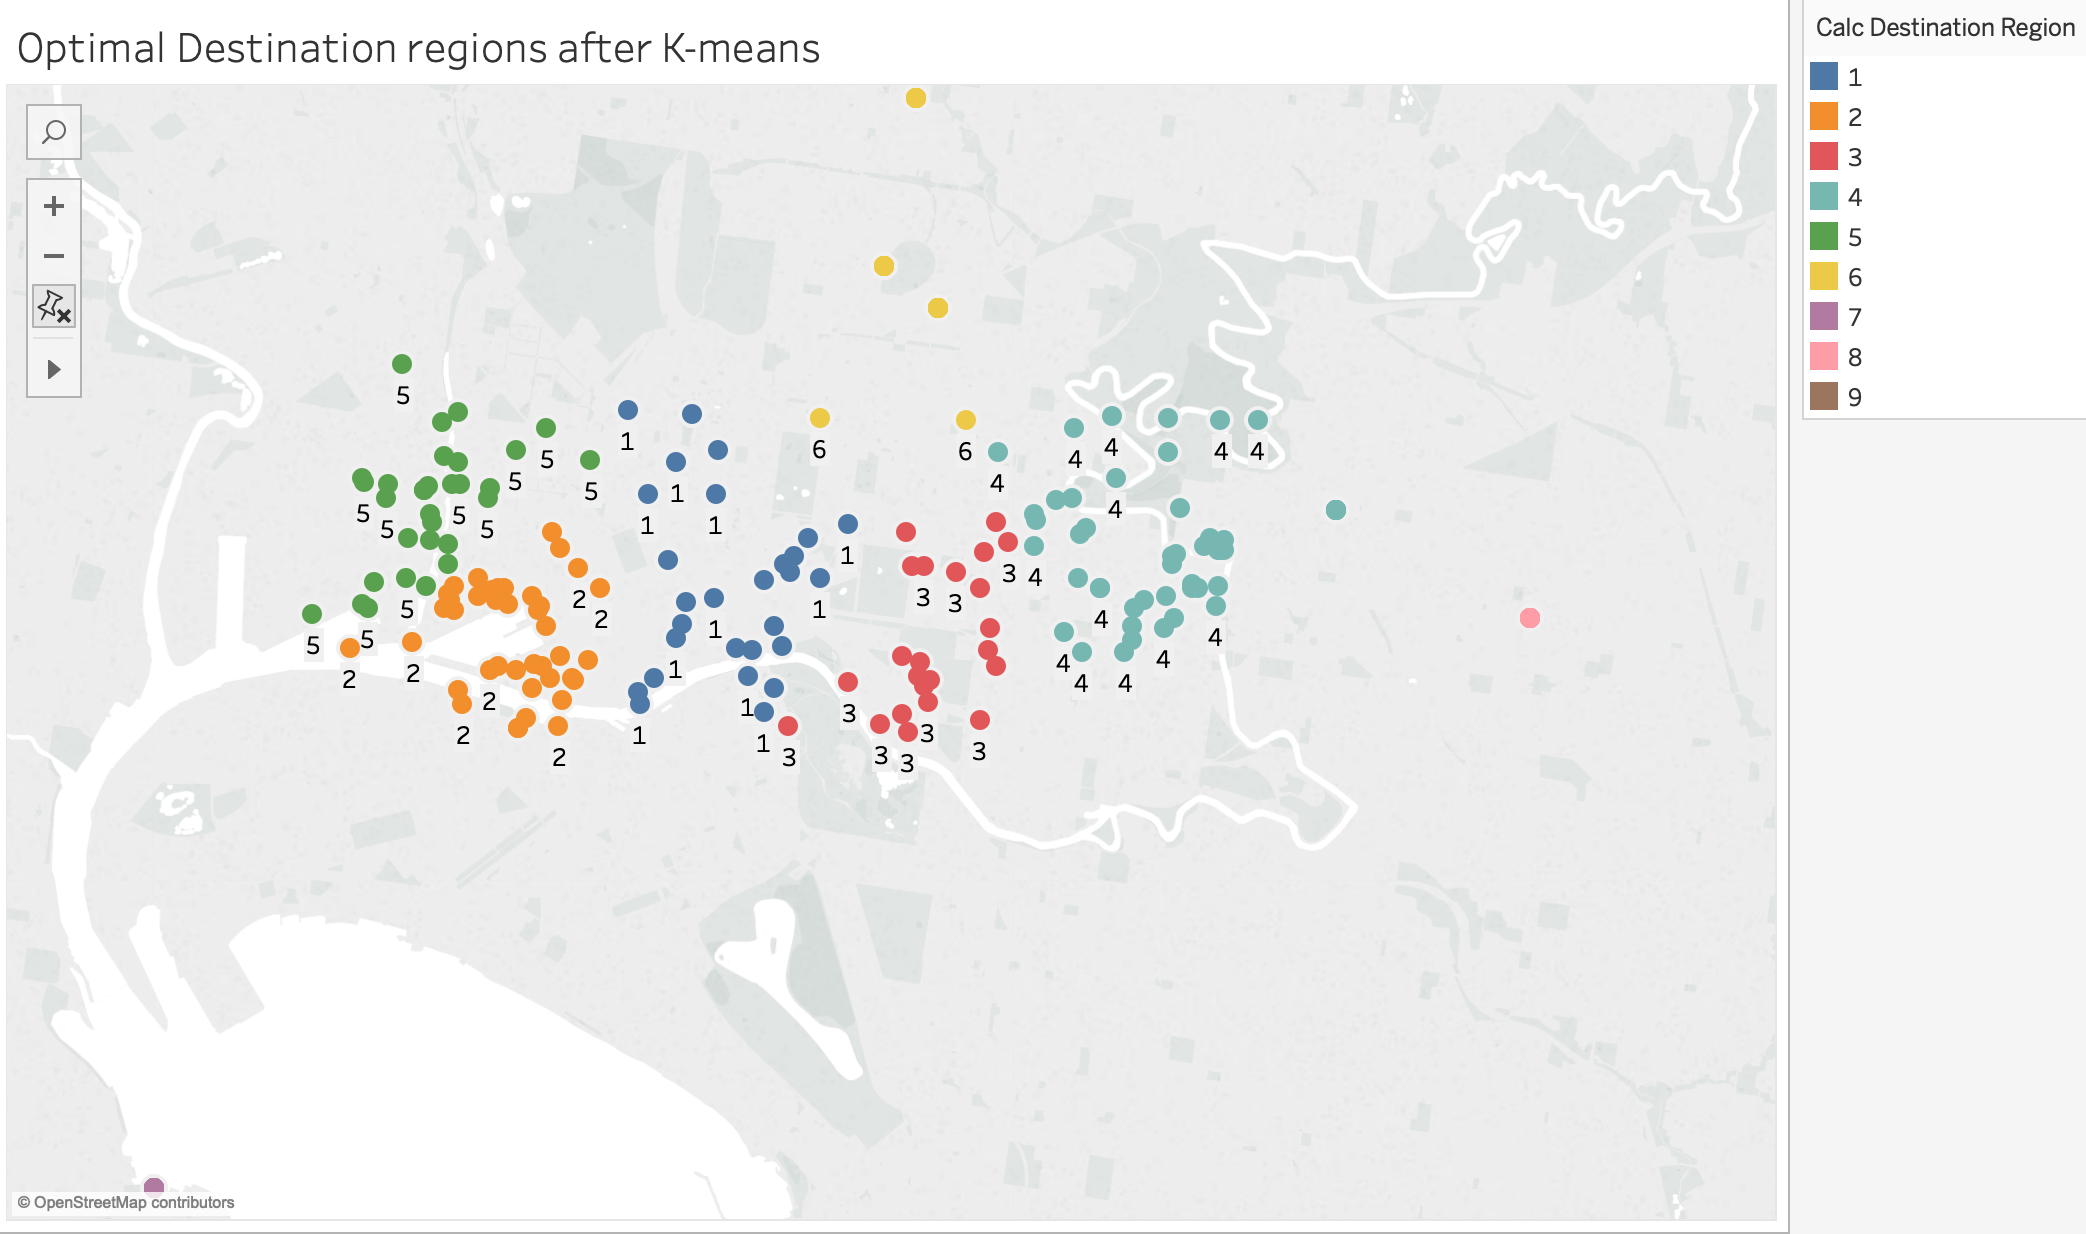

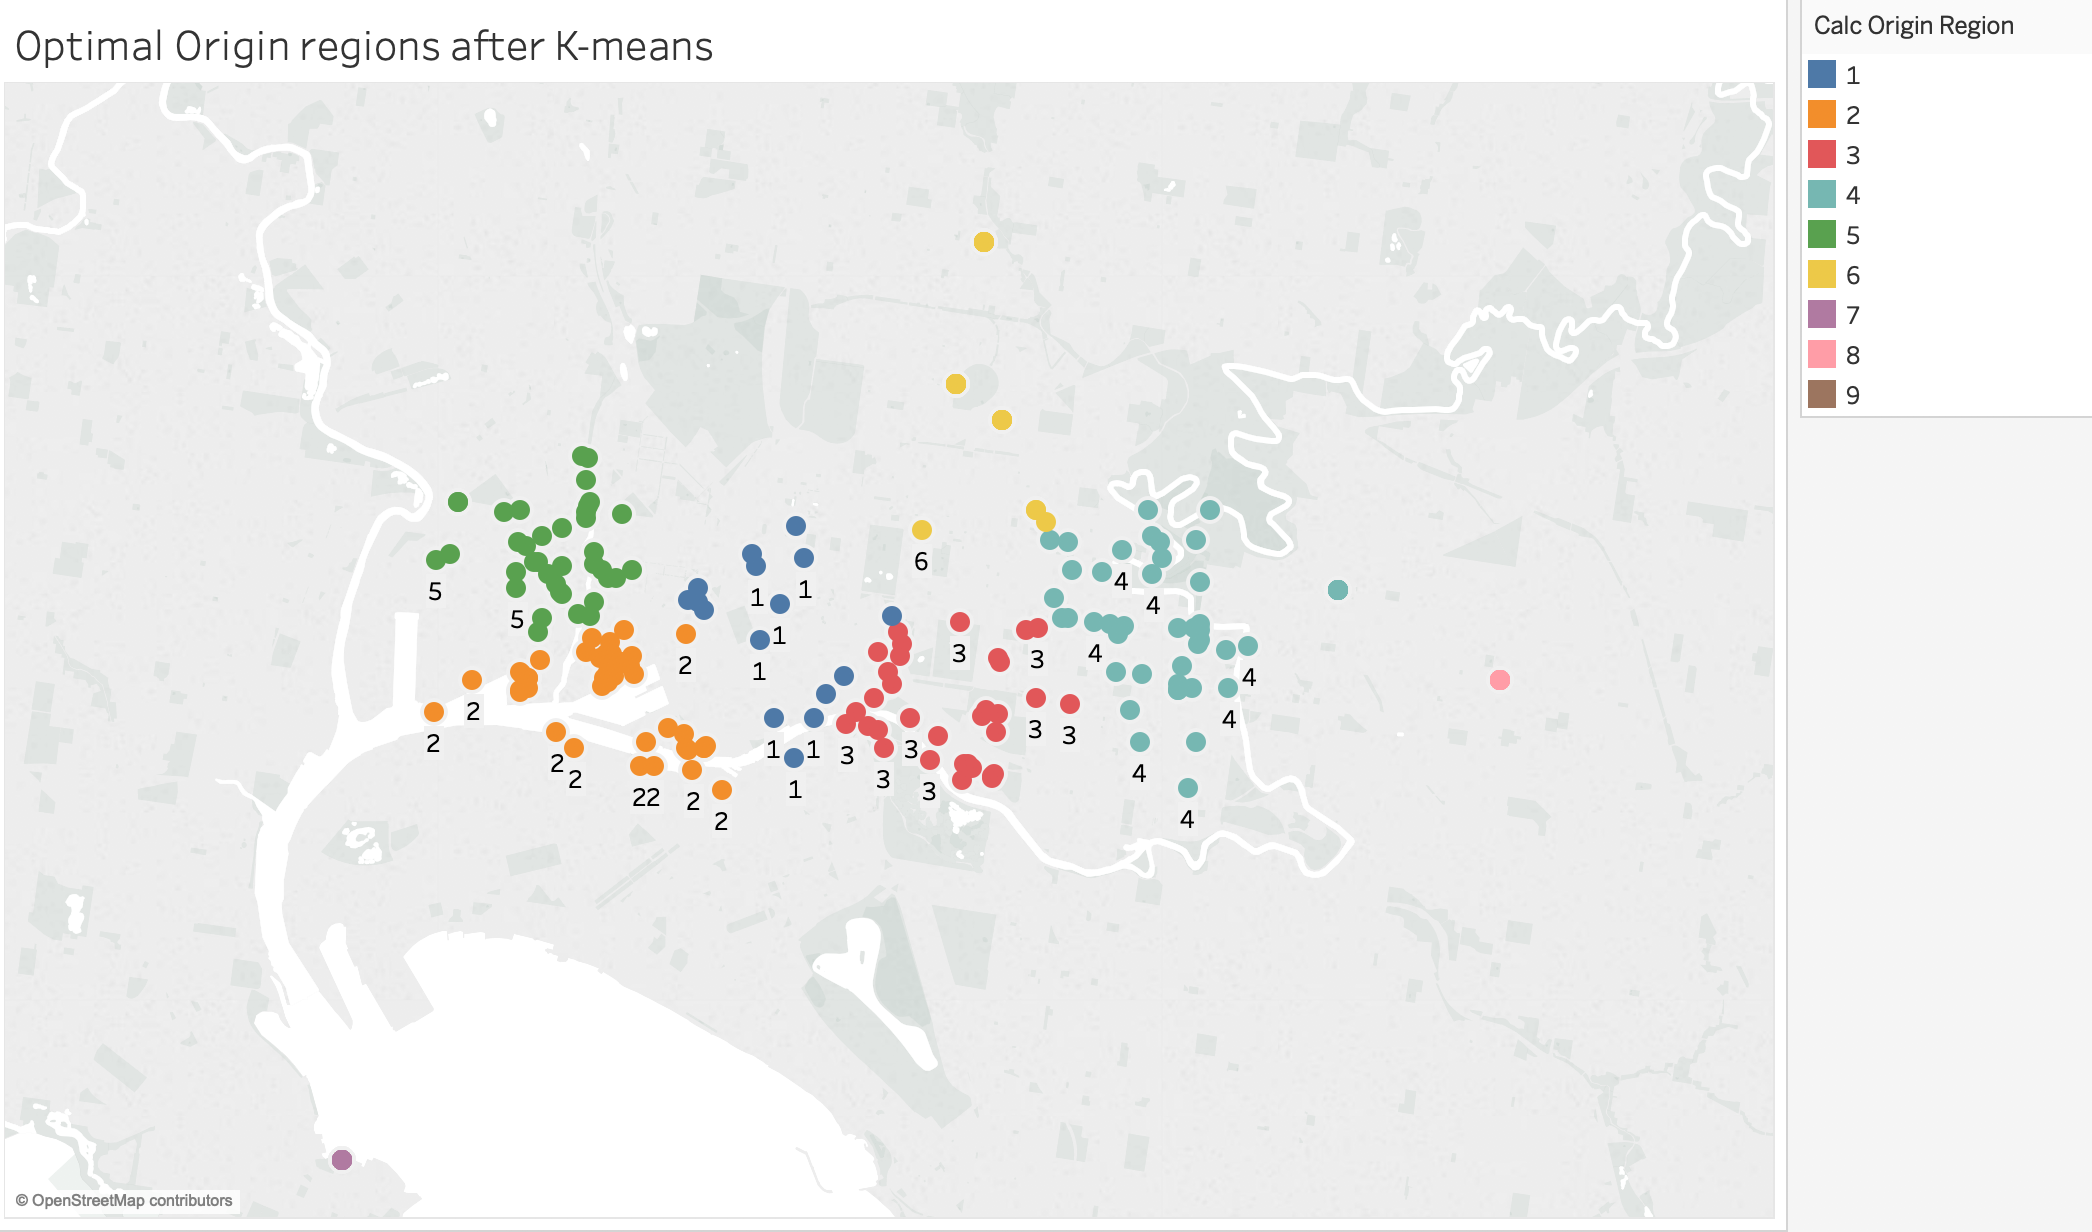

### Correcting date format

Two types of date formats are detected, which are:
1. `%Y-%m-%d` : Year-month-day

2. `%d/%m/%y` : Day-month-year

3. `%Y-%d-%m` : Year-day-month

Out of these first one is the most common one, so it would be thw right format and the other ones would be errors. We will correct it and bring it in a common format.
This is another kind of **Syntactical Anomaly** where uniform format is not followed.

Upon careful inspection, another **Semantic error** identified in this column are few dates out of the month constraint, like, month of february has day of 31 in the date ('2018-02-30). Other wrong dates include,'2018-06-31' and '2018-04-31'.

In [23]:
# defining wrong dates
wrong_dates = {'2018-06-31','2018-04-31','2018-02-30'}
data['correct_date'] = pd.to_datetime(data.departure_date , format = '%Y-%m-%d', errors = 'coerce')
date_indexes = data[((data.correct_date.isnull()) | (data.departure_date.isin(wrong_dates)))].index.to_list()
data.drop(['correct_date'], axis=1, inplace = True)

In [24]:
# Separating months according to days in months
months_30 = {'04','06','09','11'}
months_31 = {'01','03','05','07','08','10','12'}

# Following function accepts a date, and returns the right form of those dates, I chose the last day of that month to correct that
def fix_dates(date):
    '''
    This function accepts a date, and split the day part, and checks its values, and set its to the last day of that month.
    '''
    date = date.split('-')
    date_day =  date[2]
    date_month = date[1]
    if date_month in months_30 and not (int(date_day) <= 30):
        date[2] = '30'
    elif date_month == '02' and not (int(date_day) <= 28):
        date[2] = '28'
    return ('-').join(date)


In [25]:
# Following function accepts a date string and returns the parsed date
def parse_date(date_string):
    '''
    This function accepts the a date and try parsing it from any of the given formats, and returns the parsed value
    '''
    formats = ['%Y-%d-%m','%d/%m/%y','%Y-%m-%d']
    for frmt in formats:
        if frmt == '%Y-%m-%d':
            date_string = fix_dates(date_string)
        try:
            return datetime.datetime.strptime(date_string, frmt)
        except ValueError:
            pass

In [26]:
# fixing date formats
data.departure_date = data['departure_date'].apply(lambda t: parse_date(t.strip()))

In [27]:
nat = np.datetime64('NaT')
print('Number of rows with no dates after parsing are',data[np.isnat(data.departure_date)].shape[0],'.')

Number of rows with no dates after parsing are 0 .


In [28]:
data.head()

id  uber_type  origin_region  destination_region  \
0  ID3487635877          1              8                   4   
1  ID1553159484          0              3                   3   
2  ID3397114293          1              8                   6   
3  ID3646335243          1              5                   6   
4  ID3427629663          1              7                   4   

   origin_latitude  origin_longitude  destination_latitude  \
0       -37.815834        145.046450            -37.810009   
1       -37.810907        144.988892            -37.808068   
2       -37.815834        145.046450            -37.790797   
3       -37.799047        144.935588            -37.790797   
4       -37.861835        144.905716            -37.814118   

   destination_longitude  journey_distance departure_date departure_time  \
0             144.995790            4510.0     2018-09-03       07:24:43   
1             144.991715             537.0     2018-08-05       08:22:56   
2             144.985865            7470.0     2018-04-20       21:25:59   
3             144.985865            7771.0     2018-07-14       10:44:36   
4             145.009281           11869.0     2018-07-26       11:59:45   

   travel_time arrival_time  fare$  calc_origin_region  \
0      1411.44      7:48:14   9.04                   8   
1       153.54      8:25:29   3.91                   3   
2      2302.38     22:04:21  25.32                   8   
3      2060.88     11:18:56  16.15                   5   
4      3714.66     13:01:39  17.24                   7   

   calc_destination_region  
0                        4  
1                        3  
2                        6  
3                        6  
4                        4

Now the dates have been parsed, and can be put in a proper format in the output file.


Now we will move towards fixing distances travelled in trips. For this task we will fetch node ID's of origin and destination from the `nodes.csv` file, on the basis of the latitude and longitude values provided in the dirty data.

### Merging dirty data with nodes data

In [29]:
# merging nodes data accroding to the longitude and latitude details
df = pd.merge(data, nodes, left_on = ['origin_latitude','origin_longitude'], right_on = ['lat','lon'], how='left')
df = df.rename(columns = {'node':'origin_node'})
df = df.drop(['lat','lon'], axis = 1)

df2 = pd.merge(df, nodes, left_on = ['destination_latitude','destination_longitude'], right_on = ['lat','lon'], how='left')
df2 = df2.rename(columns = {'node':'destination_node'})
df2 = df2.drop(['lat','lon'], axis = 1)

In [30]:
df2.head()

id  uber_type  origin_region  destination_region  \
0  ID3487635877          1              8                   4   
1  ID1553159484          0              3                   3   
2  ID3397114293          1              8                   6   
3  ID3646335243          1              5                   6   
4  ID3427629663          1              7                   4   

   origin_latitude  origin_longitude  destination_latitude  \
0       -37.815834        145.046450            -37.810009   
1       -37.810907        144.988892            -37.808068   
2       -37.815834        145.046450            -37.790797   
3       -37.799047        144.935588            -37.790797   
4       -37.861835        144.905716            -37.814118   

   destination_longitude  journey_distance departure_date departure_time  \
0             144.995790            4510.0     2018-09-03       07:24:43   
1             144.991715             537.0     2018-08-05       08:22:56   
2             144.985865            7470.0     2018-04-20       21:25:59   
3             144.985865            7771.0     2018-07-14       10:44:36   
4             145.009281           11869.0     2018-07-26       11:59:45   

   travel_time arrival_time  fare$  calc_origin_region  \
0      1411.44      7:48:14   9.04                   8   
1       153.54      8:25:29   3.91                   3   
2      2302.38     22:04:21  25.32                   8   
3      2060.88     11:18:56  16.15                   5   
4      3714.66     13:01:39  17.24                   7   

   calc_destination_region  origin_node  destination_node  
0                        4   1889485053        4061053476  
1                        3    241807193         681285284  
2                        6   1889485053        4307007286  
3                        6   2185303474        4307007286  
4                        4   1390575046        2481930759

We have succesfully merges the data!

### Calculating shortest distances

Now we will be computing shortest distance with the help of Dijisktra's Algorithm. We will be using `edges.csv` file, which contains information after distance ad speed limit between two nodes. 

We will use `networkx` library to build a graph of nodes using distance as the weights. This graph will later be used to apply Dijikstra's and compute shortes distance between my origin nodes and destination nodes.

In [31]:
# Building Graph between nodes using distance as weights
Graph = nx.from_pandas_edgelist(edges, 'u', 'v', ['distance(m)'])

short_dist = {}
paths = {}
travel_times = {}

df2['calc_distance'] = np.NaN

# Following loop iterates upon all the rows of my dataset and calculate shortest distance and all paths with shortest distance between origin and destination nodes.
# 'single_source_dijkstra()' is used to calculate the shortest distance
# 'all_shortest_paths()' is used to generate paths with shortest distance for all trips

for index in range(df2.shape[0]):
    
    src = df2.loc[index,'origin_node']
    des = df2.loc[index,'destination_node']
    
    dist, path = nx.single_source_dijkstra(Graph,source=src, target=des, weight = 'distance(m)')
    df2.loc[index,'calc_distance'] = dist
    
    short_dist[(src,des)] = dist
    # Generating all shortest paths for all trips
    paths[(src,des)] = list(nx.all_shortest_paths(Graph,source=src, target=des, weight='distance(m)'))

# Storing indexes where calculate distance is not equal to given distance.
distance_indexes = df2[(df2.journey_distance != df2.calc_distance)].index.to_list()


Now we will update distances for trips, where the distance provided is not the shortest one.

In [32]:
print('The number of rows in which distance are not shortest are',df2[df2.journey_distance != df2.calc_distance].shape[0],'.')
df2.loc[(df2.journey_distance != df2.calc_distance),'journey_distance'] = df2[(df2.journey_distance != df2.calc_distance)].calc_distance


The number of rows in which distance are not shortest are 5 .


In [33]:
print('The number of rows in which distance are not shortest, after correction are',df2[df2.journey_distance != df2.calc_distance].shape[0],'.')


The number of rows in which distance are not shortest, after correction are 0 .


### Travel time and Arrival time

Now we will check the integrity constaraint on travel times and arrival time based on the formula ` Departure time + Travel time = Arrival time`. Any rows where this property violates leads to the presence of another **'Semantic Anomaly'** in our dataset.

Firstly, we will check for rows where `Departure time > Arrival time`.

In [34]:
df2[['departure_time','travel_time','arrival_time']][df2.departure_time > df2.arrival_time]

departure_time  travel_time arrival_time
12        21:43:09     11736.30      0:58:45
15        21:25:20     10837.80      0:25:57
25        23:39:32      3645.30      0:40:17
38        21:30:09     10275.18      0:21:24
48        21:33:39     11308.14      0:42:07
89        23:56:57      3663.78      0:58:00
121       22:13:35     11491.32      1:25:06
122       20:56:14      3535.56      1:49:38
133       21:21:25     10601.22      0:18:06
143       23:48:03      2044.80      0:22:07
167       20:23:42       580.86     20:14:02
168       12:27:25      3859.50     11:23:06
169       13:16:17       380.64     13:09:57
171       16:58:37     12976.50     13:22:21
173       20:46:36     11702.10     17:31:34
174        3:19:49     10941.96     00:17:28
175       23:13:36      2552.82     22:31:04
178        6:04:56       973.02     05:48:43
181       20:11:14      1891.86     19:39:43
182       22:07:30     11407.86      1:17:37
183       22:30:31     11065.68     19:26:06
259       23:43:11      2302.38      0:21:33
288       23:47:38      2090.46      0:22:28
305       22:52:49     11155.14      1:58:44
308       23:31:31      2083.20      0:06:14

We can see that some trips ends on the next day of the departure date. However, some rows like index 167, has departure time after arrival time. Since every row can only have one error, we can assume travel time is correct and will correct arrival and departure times, with the help of formula, 
<center>` Arrival time + Travel time = Departure time` </center>

In [35]:
# Checking for rows whcih satisfies above condition
df2[['departure_time','travel_time','arrival_time']][(pd.to_datetime(df2.arrival_time) + pd.to_timedelta(df2.travel_time, unit = 's')).astype('datetime64[s]').dt.time == pd.to_datetime(df2.departure_time).dt.time]


departure_time  travel_time arrival_time
167       20:23:42       580.86     20:14:02
168       12:27:25      3859.50     11:23:06
169       13:16:17       380.64     13:09:57
171       16:58:37     12976.50     13:22:21
173       20:46:36     11702.10     17:31:34
174        3:19:49     10941.96     00:17:28
175       23:13:36      2552.82     22:31:04
178        6:04:56       973.02     05:48:43
181       20:11:14      1891.86     19:39:43
183       22:30:31     11065.68     19:26:06

Now, we will swap departure and arrival times in the above rows.

In [36]:
# Swapping departure and arrival times
swap_indexes = df2[(pd.to_datetime(df2.arrival_time) + pd.to_timedelta(df2.travel_time, unit = 's')).astype('datetime64[s]').dt.time == pd.to_datetime(df2.departure_time).dt.time].index
df2.loc[swap_indexes,['departure_time','arrival_time']] = df2.loc[swap_indexes,['arrival_time','departure_time']].values

Now we will look for the rows which violates our integrity equation of ` Departure time + Travel time = Arrival time`.

If any such rows are found, then by assuming the departure time is correct we can safely assume some anomalies in travel time and arrival times.

In [37]:
# rounding off time to two decimal places
df2['travel_time'] = df2.travel_time.apply(lambda t: round(t,2))

# calculated arrival time = departure time + travel time given
df2['calc_arrival'] = (pd.to_datetime(df2.departure_time) + pd.to_timedelta(df2.travel_time, unit = 's')).astype('datetime64[s]').dt.time

print('Number of rows with wrong arrival time is',df2[pd.to_datetime(df2.arrival_time).dt.time != df2.calc_arrival].shape[0],'!')
df2[['departure_time','travel_time','arrival_time','calc_arrival']][pd.to_datetime(df2.arrival_time).dt.time != df2.calc_arrival]

Number of rows with wrong arrival time is 20 !


departure_time  travel_time arrival_time calc_arrival
74        07:08:59      1262.98      7:28:45     07:30:01
75        01:01:54      1875.88      1:31:56     01:33:09
77        07:10:39       830.46      7:24:14     07:24:29
78        08:07:38     10738.72     11:06:05     11:06:36
79        07:32:58      1483.90      7:57:46     07:57:41
82        04:13:58      1210.18      4:33:52     04:34:08
85        09:38:06      2276.70     10:14:38     10:16:02
86        09:08:02     10940.46     12:09:49     12:10:22
91        13:07:12       973.84     13:22:30     13:23:25
94        07:14:40       945.16      7:29:21     07:30:25
99        23:14:18       982.56      4:45:16     23:30:40
101       11:33:11      3729.06     12:18:58     12:35:20
107       19:01:25      3523.02     19:04:52     20:00:08
108       13:23:49      1797.36     18:44:55     13:53:46
110       16:59:43      1939.02     20:57:48     17:32:02
116       16:31:28       718.80     20:11:58     16:43:26
117       12:13:08      2214.60     15:43:56     12:50:02
119       11:18:26     13204.98     12:30:57     14:58:30
122       20:56:14      3535.56      1:49:38     21:55:09
123       19:32:22      1785.18     22:31:34     20:02:07

Now we will correct these 20 rows found! We will compute travel time on the shortest paths returned by Dijikstra's.

In [38]:
def traveltime(path, edges):
    '''
    This function accepts any paths, which is a list of nodes vistied in the order, and returns the travel time taken on that.
    'edges.csv' is used to compute time by using distance and speed between any two nodes.
    '''
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v == path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt

In [39]:
# Following function will be used to filter large dataset of edges, to the the dataset containing details about nodes visited in my paths.
def relevant_nodes(paths):
    '''
    This function accepts a dictionary of paths, and returns all the visited nodes in all the paths.
    '''
    visited_nodes = set()

    for key,path in paths.items():
        for p in path:
            visited_nodes = visited_nodes|set(p)
    return visited_nodes

In [40]:
# Following function filters edges dataset and returns trimmed dataset for the nodes required.
def filter_edges(visited_nodes):
    return edges[(edges.u.isin(visited_nodes) | edges.v.isin(visited_nodes))] 

Since the `edges.csv` contains more than 250,000 rows, we can filter it for the nodes that are traversed in our paths, with the help of above two functions.

In [41]:
filtered_edges = filter_edges(relevant_nodes(paths))
print('Number of rows in filtered edges are',filtered_edges.shape[0])

Number of rows in filtered edges are 19386


Now we will be computing travel times in the rows which violated integrity constraint by using `traveltime()` function. Then we will check whether the time calculated is same as one of the times computed for the shortest paths by Dijikstra's. If it is true, then we can infer that the problem is in 'Arrival Time' and fix that using `Arrival time = Departure time + Travel time `, and if it is false, then the travel time given is wrong and can be corrected by using the formula `Travel time = Arrival time - Departure time`.

In [42]:
# filtering relevant indexes
relevant_index = df2[pd.to_datetime(df2.arrival_time).dt.time != df2.calc_arrival].index.to_list()

# Iterating over all indexes
for index in relevant_index:
    # Getting ride details, i.e. 'origin_node' and 'destination_node'
    ride = tuple(df2.loc[index,['origin_node','destination_node']].to_list())
    current_time = df2.loc[index, 'travel_time']

    travel_times = []
    
    # Iterating over all paths computed by Dijikstra's for every ride
    for path in paths[ride]:
        # Computing travel times for all rides
        travel_times.append(round(traveltime(path, filtered_edges),2))
     
    # Checking if the time provided is in the travel times of shortest paths
    if current_time in travel_times:
        # Fixing Arrival time, if condition satisfies
        calc_arrival_time = (pd.to_datetime(df2.loc[index, 'departure_time']) + pd.to_timedelta(df2.loc[index, 'travel_time'], unit='s')).strftime(format="%H:%M:%S")
        df2.loc[index, 'arrival_time'] = calc_arrival_time
    else:
        # Fixing Travel time, if condition is False
        df2.loc[index, 'travel_time'] = (df2.loc[index, 'arrival_time'] - pd.to_timedelta(df2.loc[index, 'departure_time'])).seconds


In [43]:
# Checking if all violations have been tackeled
df2['calc_arrival'] = (pd.to_datetime(df2.departure_time) + pd.to_timedelta(df2.travel_time, unit = 's')).astype('datetime64[s]').dt.time

print('Number of rows with wrong arrival time is',df2[pd.to_datetime(df2.arrival_time).dt.time != df2.calc_arrival].shape[0],'!')



Number of rows with wrong arrival time is 0 !


In [44]:
df2.head()

id  uber_type  origin_region  destination_region  \
0  ID3487635877          1              8                   4   
1  ID1553159484          0              3                   3   
2  ID3397114293          1              8                   6   
3  ID3646335243          1              5                   6   
4  ID3427629663          1              7                   4   

   origin_latitude  origin_longitude  destination_latitude  \
0       -37.815834        145.046450            -37.810009   
1       -37.810907        144.988892            -37.808068   
2       -37.815834        145.046450            -37.790797   
3       -37.799047        144.935588            -37.790797   
4       -37.861835        144.905716            -37.814118   

   destination_longitude  journey_distance departure_date departure_time  \
0             144.995790            4510.0     2018-09-03       07:24:43   
1             144.991715             536.0     2018-08-05       08:22:56   
2             144.985865            7470.0     2018-04-20       21:25:59   
3             144.985865            7771.0     2018-07-14       10:44:36   
4             145.009281           11869.0     2018-07-26       11:59:45   

   travel_time arrival_time  fare$  calc_origin_region  \
0      1411.44      7:48:14   9.04                   8   
1       153.54      8:25:29   3.91                   3   
2      2302.38     22:04:21  25.32                   8   
3      2060.88     11:18:56  16.15                   5   
4      3714.66     13:01:39  17.24                   7   

   calc_destination_region  origin_node  destination_node  calc_distance  \
0                        4   1889485053        4061053476         4510.0   
1                        3    241807193         681285284          536.0   
2                        6   1889485053        4307007286         7470.0   
3                        6   2185303474        4307007286         7771.0   
4                        4   1390575046        2481930759        11869.0   

  calc_arrival  
0     07:48:14  
1     08:25:29  
2     22:04:21  
3     11:18:56  
4     13:01:39

We are done handling all the errors, and its time to get the output file!

In [45]:
# Getting proper formats of dates and times
df2.departure_date = df2.departure_date.apply(lambda t : t.strftime(format = '%Y-%m-%d'))

df2 = df2.rename(columns = {'id':''})
header[0] = ''

In [46]:
# Dropping irrelevant columns
cols = ['calc_origin_region','calc_destination_region','origin_node','destination_node','calc_distance','calc_arrival']
df2.drop(cols,axis=1,inplace=True)

In [47]:
# writing to csv file
df2.to_csv('29895405_dirty_data_solution.csv',index = False, header = header)

## Task 2 - Missing Data

This data majorly covers the **'Coverage Anomalies'** of missing data.

### Reading data

We will read data file with missing values into a dataframe using `read_csv()` function from pandas library.
We will using cleaned data file generated from Task - 1 and rows with non-null values in missing dataset, for training our models to impute the missing data.

In [48]:
missing_df = pd.read_csv('29895405_missing_value.csv')

training_df = pd.read_csv('29895405_dirty_data_solution.csv')

header = missing_df.columns.to_list()
missing_df = missing_df.rename(columns = {'Unnamed: 0':'id'})
training_df = training_df.rename(columns = {'Unnamed: 0':'id'})

# Changing columnn names for easy access in later stages
missing_df.columns = missing_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\(s\)', '').str.replace('\(m\)', '').str.replace('$','')
training_df.columns = training_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\(s\)', '').str.replace('\(m\)', '').str.replace('$','')


Let's check the missing values in the `missing_df` dataframe.

In [49]:
missing_df.isnull().sum()

id                        0
uber_type                20
origin_region             0
destination_region        0
origin_latitude           0
origin_longitude          0
destination_latitude      0
destination_longitude     0
journey_distance          0
departure_date            0
departure_time            0
travel_time               0
arrival_time              0
fare                     19
dtype: int64

There are 20 missing values in `uber_type` and 19 missing values in `fare`.

### Uber type

We can easily correct the `uber_type` in the same way we did in Task - 1, with the pattern between `id` and `uber_type`, which is, ID's strating with 'ID1' corresponds to uber type '0', ID's strating with 'ID3' corresponds to uber type '1', and ID's strating with 'ID5' corresponds to uber type '2'.

In [50]:
# Storing indexes of rows with missing uber_type values
missing_indexes = missing_df[missing_df.uber_type.isnull()].index

# Correcting Uber Type
for index in missing_indexes:
    if missing_df.loc[index,'id'].startswith('ID1'):
        missing_df.loc[index,'uber_type'] = 0
    elif missing_df.loc[index,'id'].startswith('ID3'):
        missing_df.loc[index,'uber_type'] = 1
    else:
        missing_df.loc[index,'uber_type'] = 2

missing_df.head()

id  uber_type  origin_region  destination_region  \
0  ID1175692122        0.0              9                   8   
1  ID1203782189        0.0              2                   5   
2  ID1771871365        0.0              8                   9   
3  ID5801114100        2.0              4                   3   
4  ID1391587949        0.0              6                   9   

   origin_latitude  origin_longitude  destination_latitude  \
0       -38.110916        144.654173            -37.815834   
1       -37.816940        144.931554            -37.805029   
2       -37.815834        145.046450            -38.110916   
3       -37.801044        145.008336            -37.824059   
4       -37.790818        144.985793            -38.110916   

   destination_longitude  journey_distance departure_date departure_time  \
0             145.046450           51032.0     2018-05-16       08:09:23   
1             144.931230            3420.0     2018-06-03       01:07:30   
2             144.654173           51032.0     2018-06-18       22:00:40   
3             144.973518            5386.0     2018-03-04       18:19:54   
4             144.654173           47186.0     2018-05-13       18:01:28   

   travel_time arrival_time    fare  
0     12681.06     11:40:44   24.93  
1       950.04      1:23:20   14.93  
2     12681.06      1:32:01   31.54  
3      1294.20     18:41:28  151.79  
4     11418.06     21:11:46   29.73

We have fixed the error in Uber types!

Now, let's check the types of objects in dataframe.

In [51]:
missing_df.dtypes

id                        object
uber_type                float64
origin_region              int64
destination_region         int64
origin_latitude          float64
origin_longitude         float64
destination_latitude     float64
destination_longitude    float64
journey_distance         float64
departure_date            object
departure_time            object
travel_time              float64
arrival_time              object
fare                     float64
dtype: object

### Fares

Now we will select and generate features to predcit fares. We can plot the correlation plot and use the most relevant one.

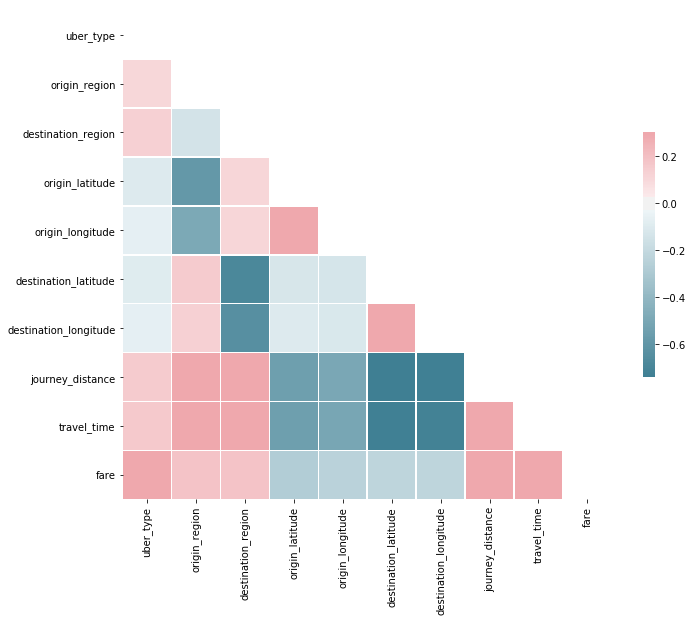

In [52]:
corr = training_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

Upon observing this corelation plot, we can see that `uber_type` has a very strong relationship with fare. Other relevant features can be `journey_distance` and `travel_time`.

We will now engineer some other features. 

**Feature 1 - `Departure Day`** : Since, we know that uber charges extra on weekends than on weekdays. We will build a feature from departure date, telling whether it's a weekday or weekend.

**Feature 2 - `Time Zone`** : Uber has segregated its charges on the basis of time the ride starts. We know that the Uber company has a specific rule to define a discrete number for morning (i.e. 0)(6:00:00 - 11:59:59), afternoon (i.e. 1,) (12:00:00 - 20:59:59), and night (i.e. 2) (21:00 - 5:59:59) to calculate the fare.


In [53]:
missing_df.departure_date = pd.to_datetime(missing_df.departure_date)
missing_df['departure_day'] = missing_df.departure_date.dt.weekday

training_df.departure_date = pd.to_datetime(training_df.departure_date)
training_df['departure_day'] = training_df.departure_date.dt.weekday

# We use 0 for for weekdays and 1 for weekend
def is_weekend(day):
    '''
    This function returns whether the passed day is weekend or weekday
    '''
    if day <= 5:
        return 0
    else:
        return 1
    
missing_df.departure_day = missing_df.departure_day.apply(lambda d: is_weekend(d))
training_df.departure_day = training_df.departure_day.apply(lambda d: is_weekend(d))

In [54]:
#  Calculating departure time

def time_zone(date):
    '''
    This function calculates the the departure time category set by uber
    '''
    hr = date.hour
    if hr >= 6 and  hr <= 11:
        return 0
    elif hr >= 12 and hr <= 20:
        return 1
    else :
        return 2

# Calcuating departure time zone
missing_df['time_zone'] = missing_df.departure_time.apply( lambda t: time_zone(pd.to_datetime(t)))
training_df['time_zone'] = training_df.departure_time.apply( lambda t: time_zone(pd.to_datetime(t)))


Let's drop null values from the missing data!

In [55]:
# Dropping null rows
dropped_df = missing_df.copy()
dropped_df.dropna(subset=['fare'], axis=0, inplace = True)

dropped_df.uber_type = dropped_df.uber_type.astype('int64')
# merging training data with non-null values of missing data
training_df = pd.concat([training_df,dropped_df],ignore_index = True)

Let's look at how well the `travel_time` and `journey_distance` are co-related to fare! Let's also try fitting a linear regression model to these.

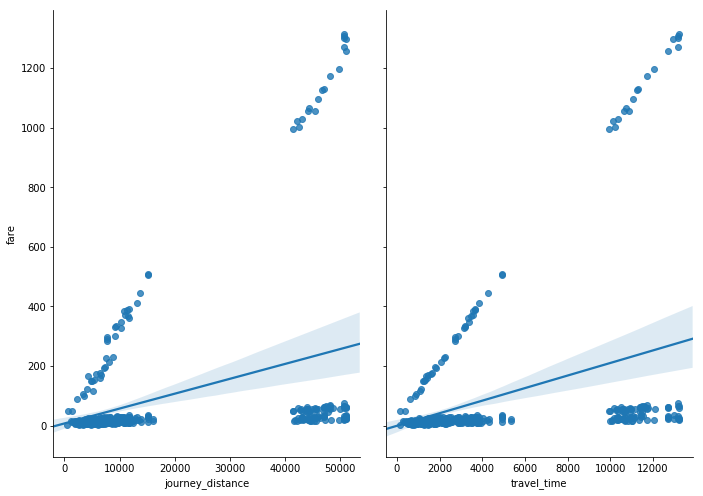

In [56]:
sns.pairplot(training_df, x_vars=['journey_distance','travel_time'], y_vars='fare', height=7, aspect=0.7, kind='reg');


From the graph above we can see that we can't fit one linear model to all of our dataset, since the `uber_types` are forming different clusters, because of their different scale.  
We will try fitting three linear models to our dataframe, according to three uber types.

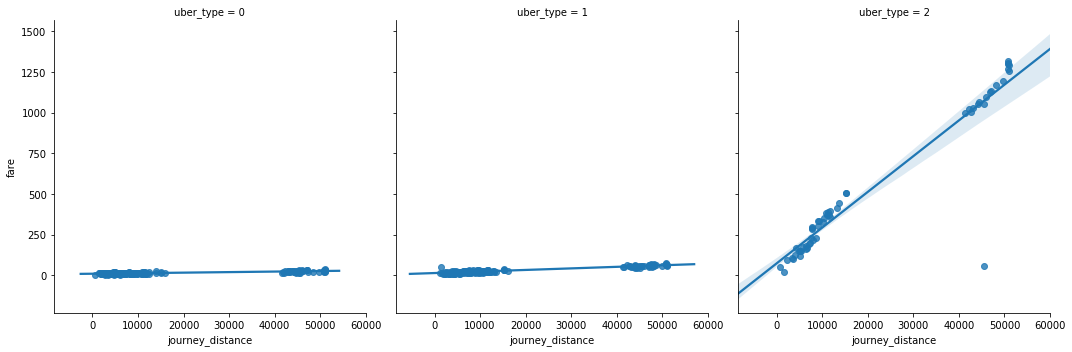

In [57]:
sns.lmplot('journey_distance','fare', col = 'uber_type',data = training_df);

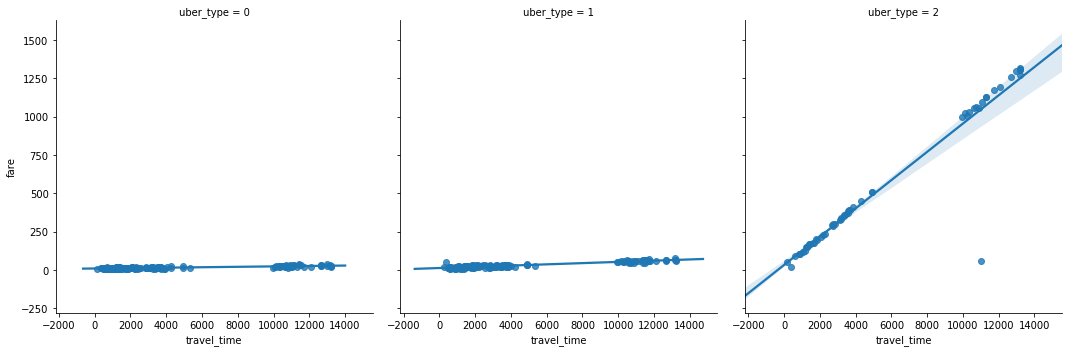

In [58]:
sns.lmplot('travel_time','fare', col = 'uber_type',data = training_df);

We can see that, linear model gives a best fit to this data, when devided by their Uber types.

Now, we will devide our data into three parts and fit three linear models to it.

We can also see that there are few outliers in our `training_df`. First, we will remove those by using linear model outlier detection, since they can itroduce bias in our results. 

**Methodology:**
1. **Rectifying the training data:** First we will fit a linear model on the training data, and predict fares on the same. After that, we will compute residuals on the training data `(Given Fare - Fare predicted)`, and perform Inter-Quantile based detection on the residuals and remove the outliers.
2. **Predicting missing fares:** Then, we will train linear model again on the training dataset wihtout outliers, and predict fares for the missing data

In [59]:
# Inter-quantile outlier detection
def iqr_detect_outlier(dataset):
    '''
    This function accepts any data series and returns the index of the outliers found in that series.
    '''
    q1, q3= np.percentile(dataset,[25,75]) # computing percentile
    iqr = q3 - q1 # Inter-Qunatile range
    median = dataset.median()
    outlier_index = []
    indexes = dataset.index.to_list()
    cutoff = 1.5*iqr
    for index in indexes:
        if np.absolute(dataset[index] - median) > cutoff:
            outlier_index.append(index)
    return outlier_index

In [60]:
# Deviding missing  and training data according to the uber types
uber_0 = missing_df[missing_df.uber_type == 0].copy()
uber_1 = missing_df[missing_df.uber_type == 1].copy()
uber_2 = missing_df[missing_df.uber_type == 2].copy()

uber_0_train = training_df[training_df.uber_type == 0].copy()
uber_1_train = training_df[training_df.uber_type == 1].copy()
uber_2_train = training_df[training_df.uber_type == 2].copy()

In [61]:
# Defing Linear Regression models
lm_for_uber0 = LinearRegression()
lm_for_uber1 = LinearRegression()
lm_for_uber2 = LinearRegression()

# Defining features
features = {'journey_distance','travel_time','departure_day','time_zone'}

# Fitting all three models using indicidual's training dataset
lm_for_uber0.fit(uber_0_train[[x for x in uber_0_train.columns if x in features]],uber_0_train.fare)
lm_for_uber1.fit(uber_1_train[[x for x in uber_1_train.columns if x in features]],uber_1_train.fare)
lm_for_uber2.fit(uber_2_train[[x for x in uber_2_train.columns if x in features]],uber_2_train.fare)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [62]:
# Outlier removal in training dataframe

# Predicting fares on the training dataset
uber_0_train['fare_predicted'] = lm_for_uber0.predict(uber_0_train[[x for x in uber_0.columns if x in features]])
uber_1_train['fare_predicted'] = lm_for_uber1.predict(uber_1_train[[x for x in uber_0.columns if x in features]])
uber_2_train['fare_predicted'] = lm_for_uber2.predict(uber_2_train[[x for x in uber_0.columns if x in features]])

#  Concating the splitted training data
uber_train = pd.concat([uber_0_train,uber_1_train,uber_2_train])

# Computing residuals
uber_train['residuals'] = uber_train.fare - uber_train.fare_predicted 

# Finding outliers using IQR outlier detection on residuals computed
train_outliers_index = set()
print('OUTLIERS IN TRAINING DATA')
for uber in range(3):
    train_outliers_index = train_outliers_index|(set(iqr_detect_outlier(uber_train[uber_train.uber_type == uber].residuals)))
    print('For Uber Type',uber,', outliers found:',len(iqr_detect_outlier(uber_train[uber_train.uber_type == uber].residuals)))

train_outliers_index = list(train_outliers_index)

# Dropping all the outliers form the dataset
training_df.drop(train_outliers_index, inplace = True)

OUTLIERS IN TRAINING DATA
For Uber Type 0 , outliers found: 11
For Uber Type 1 , outliers found: 6
For Uber Type 2 , outliers found: 3


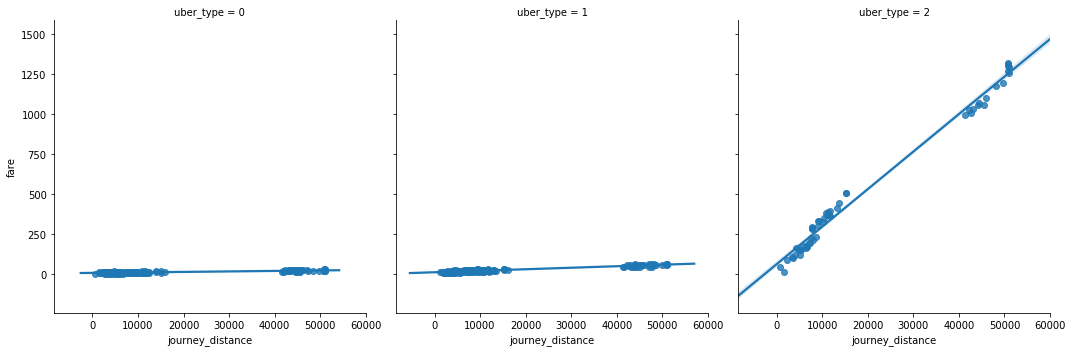

In [63]:
sns.lmplot('journey_distance','fare', col = 'uber_type',data = training_df);

Now we can see the outliers are removed from training data!

Now, we will compute missing fares after training Linear Regression model on the filtered training data.

In [64]:
# Re-defining uber training sets with new training_df
uber_0_train = training_df[training_df.uber_type == 0]
uber_1_train = training_df[training_df.uber_type == 1]
uber_2_train = training_df[training_df.uber_type == 2]

# Defing Linear Regression models
lm_for_uber0 = LinearRegression()
lm_for_uber1 = LinearRegression()
lm_for_uber2 = LinearRegression()

# Fitting all three models using indicidual's training dataset
lm_for_uber0.fit(uber_0_train[[x for x in uber_0_train.columns if x in features]],uber_0_train.fare)
lm_for_uber1.fit(uber_1_train[[x for x in uber_1_train.columns if x in features]],uber_1_train.fare)
lm_for_uber2.fit(uber_2_train[[x for x in uber_2_train.columns if x in features]],uber_2_train.fare)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Now, we have trained our model on new training set without outliers and will generate our predictions further!

In [65]:
# Predicitng fares for all missing rows in each uber type data
uber_0['fare_predicted'] = lm_for_uber0.predict(uber_0[[x for x in uber_0.columns if x in features]])
uber_1['fare_predicted'] = lm_for_uber1.predict(uber_1[[x for x in uber_0.columns if x in features]])
uber_2['fare_predicted'] = lm_for_uber2.predict(uber_2[[x for x in uber_0.columns if x in features]])

# Concating all the data together
uber = pd.concat([uber_0,uber_1, uber_2])

We have predicted the values of fares using all the features we selected and engineered. Now we will put those in `missing_df`.

In [66]:
# Merging the predicted values with the original missing data
missing_df = pd.merge(missing_df,uber[['id','fare_predicted']], on = 'id', how = 'left')

# Rounding off predicted fares upto two decimal places
missing_df.fare_predicted = missing_df.fare_predicted.apply(lambda f: round(f,2))

Let's check the accuracy of our predicted values.

We will be using  RMSE and R-squared values to quantify and compare our predictions. We will use `mean_squared_error()` and `r2_score()` functions from 'sklearn.metrics' library.

In [67]:
# Dropping rows with missing values to check accuracy
dropped_df = missing_df.copy()
dropped_df.dropna(subset=['fare'], axis=0, inplace = True)
dropped_df.head()

print('ACCURACY\n')
# Prinitng Accuracy for each Uber type
for i in range(3):

    rmse = mean_squared_error(dropped_df[dropped_df.uber_type == i].fare, dropped_df[dropped_df.uber_type == i].fare_predicted)
    r2 = r2_score(dropped_df[dropped_df.uber_type == i].fare, dropped_df[dropped_df.uber_type == i].fare_predicted)
    
    print('For Uber-Type',i,',')
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2,'.\n')

# Printing the accuracy for all dataset 
rmse_uber = mean_squared_error(dropped_df.fare, dropped_df.fare_predicted)
r2_uber = r2_score(dropped_df.fare, dropped_df.fare_predicted)
print('For complete dataset')
print('Root mean squared error: ', rmse_uber)
print('R2 score: ', r2_uber,'.\n')


ACCURACY

For Uber-Type 0 ,
Root mean squared error:  12.467496296296295
R2 score:  0.8402943221846536 .

For Uber-Type 1 ,
Root mean squared error:  26.262710714285713
R2 score:  0.9293480230760919 .

For Uber-Type 2 ,
Root mean squared error:  59.92375263157876
R2 score:  0.9994795327859336 .

For complete dataset
Root mean squared error:  25.219326732673228
R2 score:  0.9993590499303966 .



'R-squared' values looks fairly good for all uber types, especially for Uber type 1 and Uber type 2.

Let's now fill the blanks with predicted values.

In [68]:
# Filling missing rows with predicted fares
missing_df.loc[missing_df.fare.isnull(),'fare'] = missing_df[missing_df.fare.isnull()].fare_predicted

In [69]:
# Dropping irrelvant columns
cols = ['departure_day','time_zone','fare_predicted']
missing_df.drop(cols, axis = 1, inplace = True)

header[0] = ''
# Saving dataframe as csv file
missing_df.to_csv('29895405_missing_data_solution.csv',index = False, header = header)

## Task 3 - Outlier

This task deals with the **`Coverage Anomalies`** of outliers.

### Reading data

In [70]:
outliers = pd.read_csv('29895405_outliers.csv', index_col = 0)

# Saving the column names of the data
header = outliers.columns.to_list()

# Changing column names for easy access
outliers = outliers.rename(columns = {'Unnamed: 0.1':'id'})
outliers.columns = outliers.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\(s\)', '').str.replace('\(m\)', '').str.replace('$','')

outliers['fare_predicted'] = np.NaN

outliers.head()

id  uber_type  origin_region  destination_region  \
0  ID3984160279          1              5                   9   
1  ID1504197634          0              2                   9   
2  ID1810289714          0              9                   1   
3  ID1223605929          0              2                   6   
4  ID5639243507          2              7                   2   

   origin_latitude  origin_longitude  destination_latitude  \
0       -37.799905        144.934745            -38.110916   
1       -37.813653        144.937020            -38.110916   
2       -38.110916        144.654173            -37.813177   
3       -37.817973        144.932053            -37.787433   
4       -37.861835        144.905716            -37.823281   

   destination_longitude  journey_distance departure_date departure_time  \
0             144.654173           46061.0     2018-01-21       00:40:13   
1             144.654173           42677.0     2018-02-04       22:25:38   
2             144.962828           43425.0     2018-02-07       01:10:52   
3             144.980377            6602.0     2018-05-12       06:56:11   
4             144.938265            9701.0     2018-02-22       19:30:25   

   travel_time arrival_time    fare  fare_predicted  
0     11069.52      3:44:42   62.98             NaN  
1     10225.74      1:16:03   31.32             NaN  
2     10439.28      4:04:51   25.73             NaN  
3      1661.76      7:23:52    9.41             NaN  
4      3187.32     20:23:32  243.55             NaN

### Plotting data

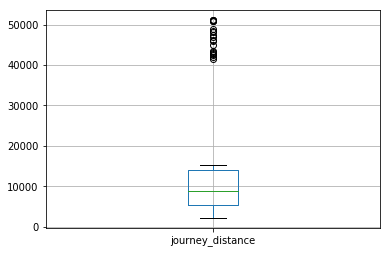

In [71]:
distance = outliers.boxplot(column = 'journey_distance')

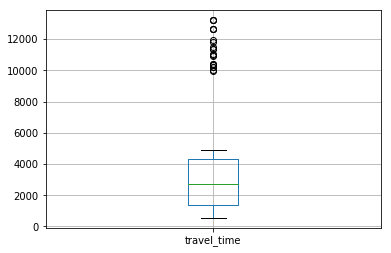

In [72]:
travel = outliers.boxplot(column = 'travel_time')

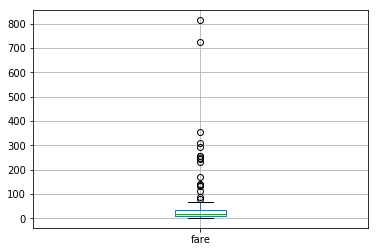

In [73]:
fare = outliers.boxplot(column = 'fare')

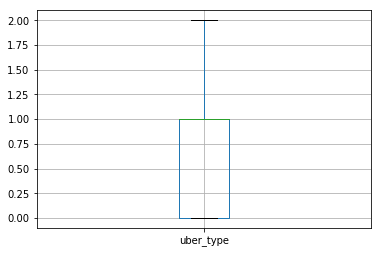

In [74]:
uber_type = outliers.boxplot(column = 'uber_type')

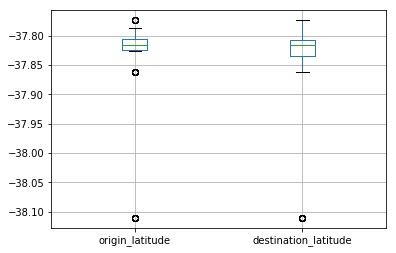

In [75]:
lat_cols = ['origin_latitude','destination_latitude']
origin = outliers.boxplot(column = lat_cols)

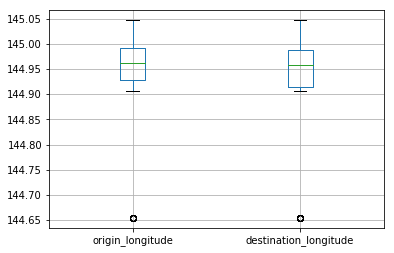

In [76]:
long_cols = ['origin_longitude','destination_longitude']
destination = outliers.boxplot(column = long_cols)

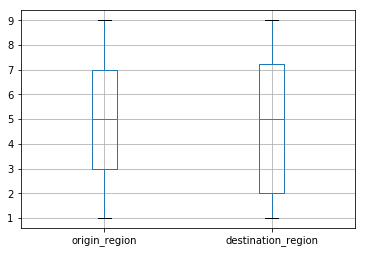

In [77]:
regions = outliers.boxplot(column = ['origin_region','destination_region'])

### Predicting fares

Since the data is co-related we will use multivariate outlier detection technique to detect and remove outliers.
We will use linear models to detect outliers in this dataset. 

First, we will predict fares for the rows, using the same model we used in Task 2 of missing data, compute residuals, and use Inter-Quantile outlier detection technique on residuals to filter out the outliers.

To use the model generated, we need to generate the features we used, i.e. `journey_distance`,`travel_time`,`departure_day`,`time_zone`.

In [78]:
# Creating features in outliers
outliers.departure_date = pd.to_datetime(outliers.departure_date)
outliers['departure_day'] = outliers.departure_date.dt.weekday                                                           
outliers.departure_day = outliers.departure_day.apply(lambda d: is_weekend(d))
outliers['time_zone'] = outliers.departure_time.apply( lambda t: time_zone(pd.to_datetime(t)))

In [79]:
# Following function predict fares for outliers data, by fitting three models on the training dataset, for each uber type
def predict_fare(uber_type):
    '''
    This function accepts a uber type, and predicts fares for that uber types in outliers data.
    It fits linear regression models on the training data, for the passed uber type and compute fares through the same.
    '''
    features = {'journey_distance','travel_time','departure_day','time_zone'}
    
    # Filtering data for one uber type
    uber = outliers.query("uber_type == {}".format(uber_type))
    training_uber = training_df.query("uber_type == {}".format(uber_type))
    
    # Defining and training linear regression model for particular uber type
    lm_for_uber = LinearRegression().fit(training_uber[[x for x in training_uber if x in features]], training_uber["fare"])
    
    # Predicting fares
    fare_predicted = lm_for_uber.predict(uber[[x for x in uber if x in features]])
    
    # Updating outliers data
    counter = 0
    for index in uber.index.to_list():
        outliers.loc[index,'fare_predicted'] = fare_predicted[counter]
        counter += 1

# Calling function 'predict_fare'  for each uber type
for types in sorted(outliers.uber_type.unique()):
    predict_fare(types)

# Computing residuals
outliers['residual'] = outliers.fare - outliers.fare_predicted


### Detecting and removal of outliers 

In [80]:
print('OUTLIERS')
outliers_indexes = set()
for uber_type in range(3):
    print('For Uber Type {}:'.format(uber_type), outliers.iloc[iqr_detect_outlier(outliers[outliers.uber_type == uber_type].residual),].shape[0])
    outliers_indexes = outliers_indexes|set(outliers.iloc[iqr_detect_outlier(outliers[outliers.uber_type == uber_type].residual),].index.to_list())

outliers_indexes = list(outliers_indexes)


OUTLIERS
For Uber Type 0: 7
For Uber Type 1: 6
For Uber Type 2: 4


In [81]:
outliers.iloc[outliers_indexes,]

id  uber_type  origin_region  destination_region  \
97  ID1506691518          0              3                   7   
34  ID5414191154          2              9                   2   
68  ID3170987893          1              7                   6   
70  ID5364577724          2              6                   9   
7   ID1267848442          0              6                   9   
71  ID5327186310          2              7                   6   
41  ID3676086034          1              9                   3   
10  ID1332655308          0              6                   3   
50  ID3534272956          1              9                   7   
19  ID3429790887          1              2                   3   
52  ID1982613153          0              8                   7   
84  ID5307103614          2              9                   2   
57  ID3490088517          1              9                   7   
90  ID1555435418          0              3                   9   
27  ID3526501634          1              6                   2   
62  ID1652357581          0              9                   7   
95  ID1470993605          0              5                   7   

    origin_latitude  origin_longitude  destination_latitude  \
97       -37.821937        144.968322            -37.861835   
34       -38.110916        144.654173            -37.823506   
68       -37.861835        144.905716            -37.787433   
70       -37.773845        144.983689            -38.110916   
7        -37.787433        144.980377            -38.110916   
71       -37.861835        144.905716            -37.787442   
41       -38.110916        144.654173            -37.823646   
10       -37.773803        144.983647            -37.817141   
50       -38.110916        144.654173            -37.861835   
19       -37.813922        144.940449            -37.821332   
52       -37.807202        145.026637            -37.861835   
84       -38.110916        144.654173            -37.813900   
57       -38.110916        144.654173            -37.861835   
90       -37.820337        144.990252            -38.110916   
27       -37.787442        144.980409            -37.819083   
62       -38.110916        144.654173            -37.861835   
95       -37.806163        144.934776            -37.861835   

    destination_longitude  journey_distance departure_date departure_time  \
97             144.905716            7819.0     2018-04-16       16:43:26   
34             144.943146           42561.0     2018-04-09       06:44:39   
68             144.980377           11633.0     2018-06-11       20:33:32   
70             144.654173           48197.0     2018-05-10       09:19:31   
7              144.654173           47033.0     2018-03-13       20:26:27   
71             144.980409           11630.0     2018-04-19       20:52:50   
41             144.975031           44850.0     2018-04-22       02:05:46   
10             144.996180            9815.0     2018-01-22       16:37:03   
50             144.905716           50797.0     2018-06-26       21:51:23   
19             144.993451            5370.0     2018-07-21       15:54:47   
52             144.905716           13986.0     2018-07-04       01:20:13   
84             144.944226           41926.0     2018-06-26       06:07:50   
57             144.905716           50797.0     2018-06-09       14:11:51   
90             144.654173           45890.0     2018-07-28       20:58:27   
27             144.946569            5498.0     2018-04-23       13:22:35   
62             144.905716           50797.0     2018-04-11       08:19:56   
95             144.905716           10756.0     2018-03-07       16:56:04   

    travel_time arrival_time     fare  fare_predicted  departure_day  \
97      2737.56     17:29:03    4.375       11.545407              0   
34     10231.62      9:35:10  725.940     1005.967955              0   
68      3645.30     21:34:17   12.035       25.280446              0   
70     11519.40

In [82]:
# Dropping all outliers
outliers.drop(outliers_indexes, axis = 0, inplace = True)

# Dropping irrelevant columns
cols = ['departure_day','time_zone','fare_predicted', 'residual']
outliers.drop(cols, axis = 1, inplace = True)

# writing outliers data
header[0] = ''
outliers.to_csv('29895405_outliers_solution.csv',index = False, header = header)

## Conclusion & Summary

This assignment measured the understanding of basic tools of Data Wrangling and Manipulation in Python programming language. The main outcomes achieved while applying these techniques were:

- **Detecting and correcting data anomalies.** It helped us understand the various types of anomalies in the data, and learn efficient techniques to correct it. 
    * By using `to_datetime()` function we were able to parse dates from different formats.
    * By using `groupby()` function, we were able to group data according to nodes, computed centres of region. Then by using `radians()`, `sin()`, and etc., we computed haversine distance between two nodes, and computed optimal region values for all nodes.
    * By using `from_pandas_edgelist()`, we were able to create a network between all nodes, and we were able to compute shortest distances and paths between two nodes by using `single_source_dijikstra()` and `all_shortest_paths()` respectively.

- **Data manipulation.** By using the `pandas` package, importing dictionaries from data frames was quite straightforward. Additional operations like filtering, enumerating, slicing, droppinng and combining also made data transformation tasks more manageable.

- **Imputing missing values.**  It helped us understand the use of Linear Regression models for imputing missing data. By using `LinearRegression()` from sklearn library, we were able to impute missing data by using training data and also compared the accuracy of our predictions by using function like `r2_score()` from 'sklearn.metrics'.

- **Data visualisation.** We were able to visualise various properties of data, by using functions like `boxplot()`, `lmplot()`, `heatmap()` and `pairplot()` from 'seaborn' library. It aided us to detect outliers and correctly monitor the corelations between various attributes in the data.

- **Detecting and removing outliers.** It aided us in learning about using linear models for outlier detection in multivariate data. We computed residuals on the 'fare' column from the linear regerssion model we trained on trainig dataset, viz, cleaned dirty data and non-null rows of missing data, and performed inter-quantile range outlier detection technique, by using `median()` and `quantile()` function in 'numpy' library, on residuals to detetct and remove outliers.


## Refrences 

- Haversine formula. (2019). Retrieved from https://en.wikipedia.org/wiki/Haversine_formula
- Overview of NetworkX — NetworkX 2.3 documentation. (2019). Retrieved from https://networkx.github.io/documentation/stable/
- H., Dunn, M., Anderson, J., G, V., Malyutin, S., & kavvuri, p. (2019). Haversine Formula in Python (Bearing and Distance between two GPS points). Retrieved from https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points